__Dhyan Thakkar__
<br>
Date: Jan. 14, 2021
<br>
PHYS 2030 W22

## <center><font color=#46769B>Exercise 2: Central Limit Theorem</font></center>

## <font color=#46769B>Introduction:</font>

Our goals for this notebook are:
- Verify that the central limit theorem holds for flipping a coin

Required reading:
- *Lesson 2: Monte Carlo sampling*

## <font color=#46769B>A remarkable fact about the Central Limit Theorem (CLT):</font>

Suppose we have samples of $x$ that come from a probability distribution $P(x)$:
$$\left(x_0, \, x_1, \, x_2, \, ..., \, x_{N-1}\right)$$
The CLT tells us that if we perform many such simulations, the mean values $\langle x \rangle$ we obtain will follow a normal distribution around the true mean $\mu$ of $P(x)$.

Notice we didn't require that $P(x)$ *itself* was a normal distribution. In fact, $P(x)$ can be *any* discrete or continuous distribution. Nevertheless, the mean values of the samples will follow a *normal distribution*.

Here we will consider the CLT in the context of flipping a coin, where $P(x)$ is certainly not a normal distribution.

## <font color=#46769B>Part 1: Flipping a coin</font>

The goal of this exercise is to verify that the CLT holds for flipping a coin. The setup is:
- We flip a coin $N$ times, each time yielding either heads ($x=1$) with probability $p$, or tails ($x=0$) with probability $1-p$. 
- We will not assume a fair coin, setting $p=0.6$.

Similar to Lecture 2, write a code `coin_flip_simulation(num)` that will return the mean value $\langle x \rangle$ after `num` coin flips.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def coin_flip_simulation(num):
  
  options = [1,0]
  p = 0.6
  prob = [p,1-p]
    
    # random.choice(options,num) will return a list of length num, randomly chosen from options
  x_samples = np.random.choice(options,num,p=prob)
    
    # Calculate <x>
  mean = np.mean(x_samples)
    
  return mean
#Assuming num = 100
num = 100

mu = coin_flip_simulation(num)

print(mu)


0.63


## <font color=#46769B>Part 2: Central Limit Theorem</font>

Perform 1000 simulations, each with `num=100`, and save your results as `list_of_means`, a list of values of $\langle x \rangle$ for each simulation. 
- Calculate the mean and standard deviation of `list_of_means`. Check that it agrees with the CLT.
- Make a histogram `list_of_means` and compare it to a normal distribution predicted by the CLT.

Mean calculated from 1000 simulations:  0.5997899999999999
Standard deviation of the means from the true mean:  0.04860098661549989
CLT predicts that most of the means calculated in the list_of_means list should be within one standard deviation
The true mean is:  0.6
For a 1000 simulations the mean calculated should be withing +-  0.018973665961010275
we can see that this is true


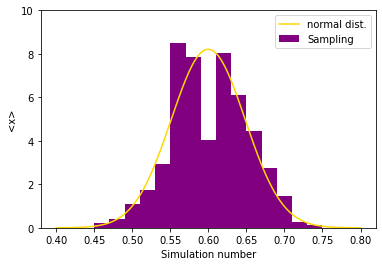

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def coin_flip_simulation(num):
  heads = 1
  tails = 0
  options = [heads,tails,heads,heads,heads,heads,heads,tails,tails,tails]
    
    # random.choice(options,num) will return a list of length num, randomly chosen from options
  x_samples = np.random.choice(options,num)
    
    # Calculate <x>
  mean = np.mean(x_samples)
    
  return mean

num = 100
list_of_means = []
for i in range(1000):
    list_of_means.append(coin_flip_simulation(num))

mean2 = np.mean(list_of_means)
print("Mean calculated from 1000 simulations: ", mean2)
std2 = np.std(list_of_means)
print("Standard deviation of the means from the true mean: ", std2)
print('CLT predicts that most of the means calculated in the list_of_means list should be within one standard deviation')
true_mean = 0.6
print("The true mean is: ", true_mean)
width = 0.6/np.sqrt(1000)
print("For a 1000 simulations the mean calculated should be withing +- ", width)
print("we can see that this is true")



plt.hist(list_of_means,bins=15,density=True, color = 'purple', label = 'Sampling')
x = np.linspace(0.4,0.8, 300)
y = 1/np.sqrt(2*np.pi*std2**2) * np.exp(-0.5*(x-mean2)**2/std2**2)
plt.plot(x,y,label='normal dist.', color = 'gold')
plt.xlabel('Simulation number')
plt.ylabel('<x>')
plt.ylim([0,10])
plt.legend()
plt.show()
